### Assignment – High Frequency Words ###

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way.)
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [3]:
# 1. Choose a corpus of interest.

import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
#print(gutenberg.fileids())
words = gutenberg.words('melville-moby_dick.txt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ron\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
# 2. How many total unique words are in the corpus? 

from nltk.probability import FreqDist
import string

nltk.download('gutenberg')
nltk.download('punkt')

# Convert to lowercase to avoid mismatch
words = [word.lower() for word in words]

# Remove punctuation tokens
words = [word for word in words if word.isalpha()]

# Total words
total_words = len(words)

# Unique words (vocabulary)
unique_words = set(words)
num_unique_words = len(unique_words)

print(f"Total words: {total_words:,}")
print(f"Unique words: {num_unique_words:,}")
print(f"Lexical diversity: {total_words / num_unique_words:.2f}")

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ron\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total words: 218,361
Unique words: 16,948
Lexical diversity: 12.88


In [15]:
# 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

# Create frequency distribution, and sort by frequency
fdist = FreqDist(words)
sorted_freqs = fdist.most_common()

# Total number of word tokens
total_count = sum(fdist.values())

# Store the counts for the words 
running_total = 0
half_total = total_count / 2
unique_counter = 0

# Store the words that contribute to 50%
top_half_words = []

# Loop through the sorted frequencies until total is >= 50%
for word, count in sorted_freqs:
    running_total += count
    unique_counter += 1
    top_half_words.append((word, count))
    if running_total >= half_total:
        break

print(f"Unique words representing 50% of total words: {unique_counter:,}")
print(f"That is {(unique_counter / len(fdist)) * 100:.2f}% of all unique words.\n")

#print("Words and their frequencies up to the 50% threshold:\n")
#for word, count in top_half_words:
#    print(f"{word:<15} {count:,}")

Unique words representing 50% of total words: 91
That is 0.54% of all unique words.



In [16]:
# 4. Identify the 200 highest frequency words in this corpus.
import pandas as pd

# Get the 200 most common words
top_200 = fdist.most_common(200)

# Convert to DataFrame for later
top_200_df = pd.DataFrame(top_200, columns=['Word', 'Frequency'])

print("Top 200 Most Frequent Words in Moby Dick:\n")
print(top_200_df.to_string(index=False))

Top 200 Most Frequent Words in Moby Dick:

    Word  Frequency
     the      14431
      of       6609
     and       6430
       a       4736
      to       4625
      in       4172
    that       3085
     his       2530
      it       2522
       i       2127
      he       1896
     but       1818
       s       1802
      as       1741
      is       1725
    with       1722
     was       1644
     for       1617
     all       1526
    this       1394
      at       1319
   whale       1226
      by       1204
     not       1151
    from       1088
     him       1067
      so       1065
      on       1062
      be       1045
     one        921
     you        894
   there        869
     now        785
     had        779
    have        768
      or        713
    were        684
    they        667
   which        648
    like        647
      me        633
    then        630
   their        620
    what        618
    some        618
    when        606
     are        5

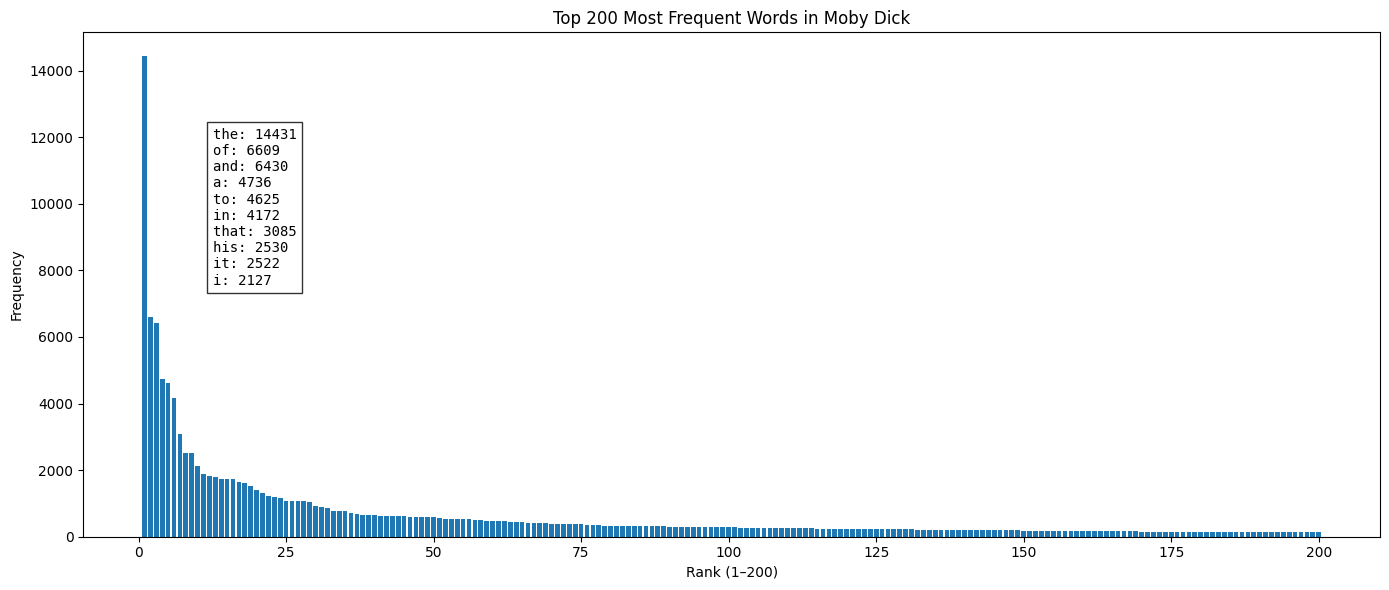

In [17]:
# 5. Create a graph that shows the relative frequency of these 200 words.

import matplotlib.pyplot as plt
import numpy as np

# Separate top 200 words into lists
words_list = [w for w, f in top_200]
freqs = [f for w, f in top_200]

# Top 10 words and counts
top10 = top_200[:10]
top10_text = "\n".join([f"{word}: {count}" for word, count in top10])

# Frequency Plot 
plt.figure(figsize=(14, 6))
plt.bar(range(1, 201), freqs)
plt.title("Top 200 Most Frequent Words in Moby Dick")
plt.xlabel("Rank (1–200)")
plt.ylabel("Frequency")

# Display top 10 words
plt.text(
    0.1, 0.5, 
    top10_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    family='monospace',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.tight_layout()
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Per the 'National Language Programming' book, Zipf's Law states the following:

    Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf’s Law states that the frequency of a word type is inversely proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

This implies that the #1 most common word should have 2x the frequency of the #2 most common word. In this case, it'd be 'the' (14,431) and 'of' (6609), which is a ratio of 2.18. The 3rd most common word is 'and' (6430), and 'the':'and' is a ratio of 2.244. 'the':'a' is 3.05, and so on. The frequency distribution of words quickly drops, and we know that the 91 most frequent words represent 0.54% of unique words, while representing 50% of total words. A small number of words represent a large fraction of total corpus tokens, and word frequency declines inversely with rank. Therefore, the words follow Zipf's Law relatively well.

### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In the Moby Dick corpus, the words with the highest frequency are: the, of, and, a, to, in, that, his, it, and i. All of these words are extremely frequent in general English corpora. The exceptions would be words such as whale (1226), ship (518), ahab (511), and other text-specific tokens, due to the subject material. 